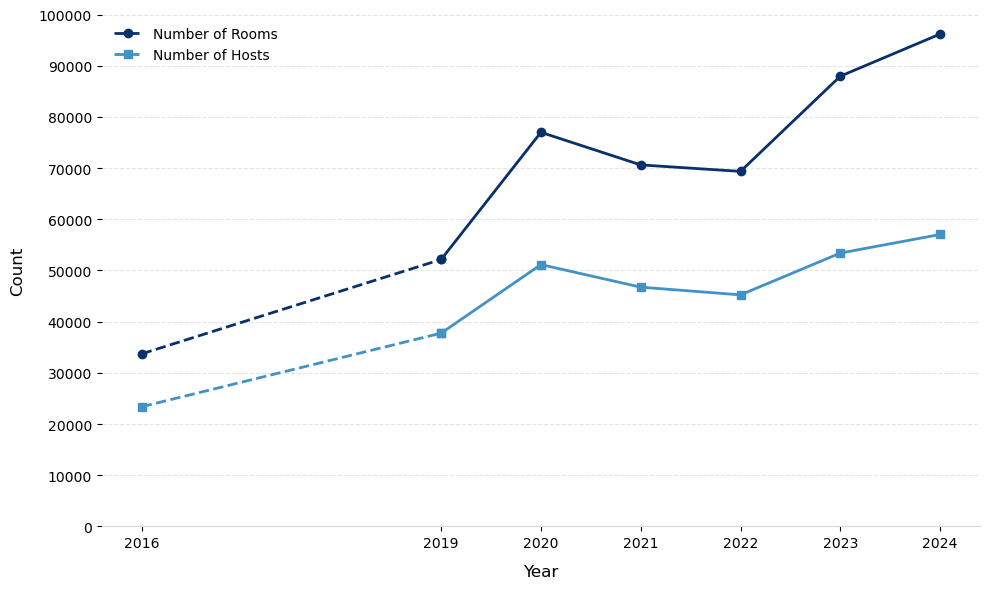

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in cleaned Inside Airbnb data
csv_urls = {
    2016: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2016_data.csv",
    2019: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2019_data.csv",
    2020: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2020_data.csv",
    2021: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2021_data.csv",
    2022: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2022_data.csv",    
    2023: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2023_data.csv",
    2024: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2024_data.csv"

}

data_2016 = pd.read_csv(csv_urls[2016])
data_2019 = pd.read_csv(csv_urls[2019])
data_2020 = pd.read_csv(csv_urls[2020])
data_2021 = pd.read_csv(csv_urls[2021])
data_2022 = pd.read_csv(csv_urls[2022])
data_2023 = pd.read_csv(csv_urls[2023])
data_2024 = pd.read_csv(csv_urls[2024])

data_2016['year'] = 2016
data_2019['year'] = 2019
data_2020['year'] = 2020
data_2021['year'] = 2021
data_2022['year'] = 2022
data_2023['year'] = 2023
data_2024['year'] = 2024

# Combine all data
all_data = pd.concat([data_2016, data_2019, data_2020, data_2021, data_2022, data_2023, data_2024])

# Calculate the total number of listings and unique hosts for each year
room_count = all_data.groupby('year')['id'].count()
host_count = all_data.groupby('year')['host_id'].nunique()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot rooms and hosts with segmented line styles
plt.plot(room_count.index[:2], room_count.values[:2], marker='o', label='Number of Rooms', 
         color='#08306B', linewidth=2, linestyle='--')  # Dashed for 2016-2019
plt.plot(room_count.index[1:], room_count.values[1:], marker='o', color='#08306B', linewidth=2)  # Solid for 2019-2024

plt.plot(host_count.index[:2], host_count.values[:2], marker='s', label='Number of Hosts', 
         color='#4292C6', linewidth=2, linestyle='--')  # Dashed for 2016-2019
plt.plot(host_count.index[1:], host_count.values[1:], marker='s', color='#4292C6', linewidth=2)  # Solid for 2019-2024

# Add title, grid, and labels
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)

# Set Y-axis limit to 100,000
plt.ylim(0, 100000)

# Set Y-axis ticks with 10000 intervals
plt.yticks(range(0, 100001, 10000))

# Customize the axes and gridlines
plt.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.8, alpha=0.7)  # Show horizontal gridlines only
plt.gca().spines['top'].set_visible(False)  # Remove the top border
plt.gca().spines['right'].set_visible(False)  # Remove the right border
plt.gca().spines['left'].set_visible(False)  # Remove the left border
plt.gca().spines['bottom'].set_color('#D9D9D9')  # Set bottom border to light gray

# Adjust tick styles
plt.xticks(room_count.index, fontsize=10)
plt.yticks(fontsize=10)

# Set legend
plt.legend(fontsize=10, loc='upper left', frameon=False)  # Single legend for simplified understanding

# Display the plot
plt.tight_layout()
plt.show()


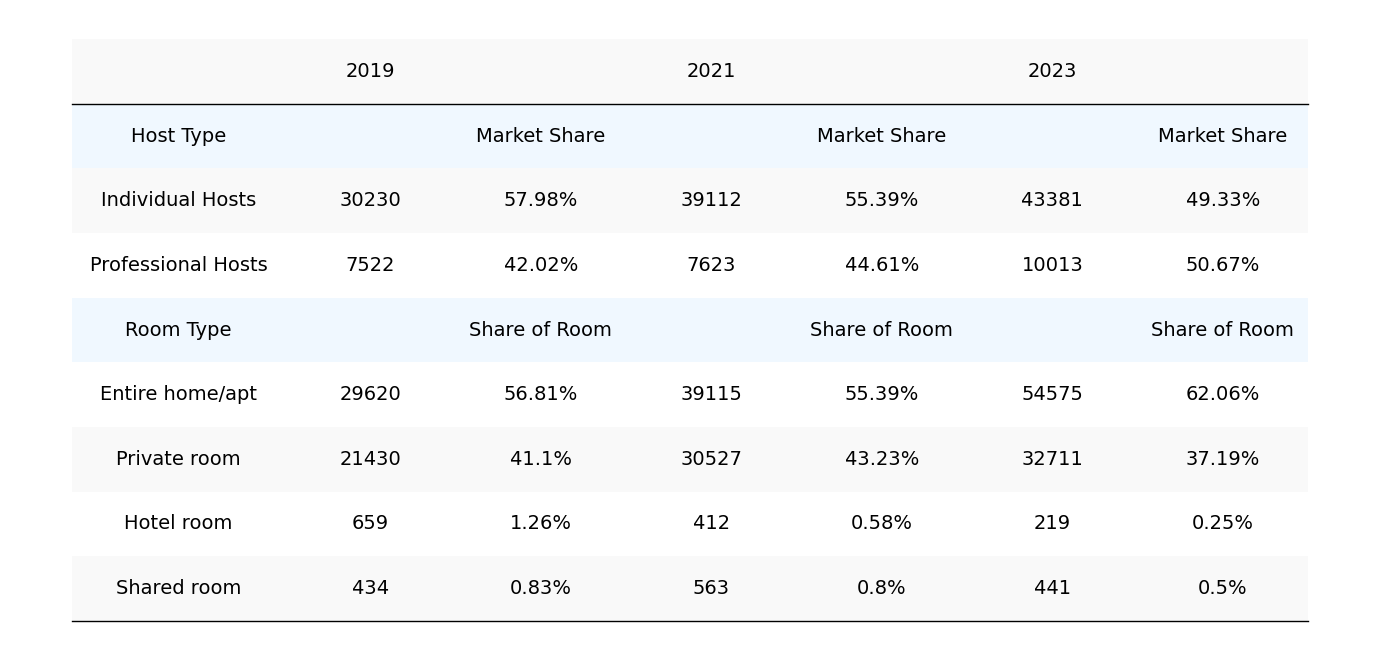

In [6]:
import pandas as pd
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

# Data source URLs
csv_urls = {
    2019: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2019_data.csv",
    2021: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2021_data.csv",
    2023: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2023_data.csv"
}

# Load data and add year columns
data_2019 = pd.read_csv(csv_urls[2019])
data_2021 = pd.read_csv(csv_urls[2021])
data_2023 = pd.read_csv(csv_urls[2023])

data_2019['year'] = 2019
data_2021['year'] = 2021
data_2023['year'] = 2023

# Function to calculate market share and unique hosts for two host types
def calculate_metrics(data):
    total_listings = data.shape[0]  # Total number of listings
    host_type_1 = data[data['calculated_host_listings_count'] == 1]
    host_type_gt_1 = data[data['calculated_host_listings_count'] > 1]
    
    metrics = {
        'Individual Hosts - Market Share (%)': round((host_type_1.shape[0] / total_listings) * 100, 2),
        'Professional Hosts - Market Share (%)': round((host_type_gt_1.shape[0] / total_listings) * 100, 2),
        'Individual Hosts - Unique Count': host_type_1['host_id'].nunique(),
        'Professional Hosts - Unique Count': host_type_gt_1['host_id'].nunique()
    }
    return metrics

# Function to calculate room type market share
def calculate_room_market_share(data):
    total_listings = data.shape[0]  # Total number of listings
    room_counts = data['room_type'].value_counts()  # Total listings by room type
    market_share = (room_counts / total_listings) * 100  # Market share by room type
    return room_counts, market_share

# Step 1: Host Metrics Initialization
metrics_results = {
    'year': [],
    'Individual Hosts - Market Share (%)': [],
    'Professional Hosts - Market Share (%)': [],
    'Individual Hosts - Unique Count': [],
    'Professional Hosts - Unique Count': []
}

# Step 2: Room Type Market Share Initialization
room_counts_results = {}
room_market_results = {}

# Step 3: Calculate metrics by year
for year, data in zip([2019, 2021, 2023], [data_2019, data_2021, data_2023]):
    # Host metrics
    metrics = calculate_metrics(data)
    metrics_results['year'].append(year)
    metrics_results['Individual Hosts - Market Share (%)'].append(metrics['Individual Hosts - Market Share (%)'])
    metrics_results['Professional Hosts - Market Share (%)'].append(metrics['Professional Hosts - Market Share (%)'])
    metrics_results['Individual Hosts - Unique Count'].append(metrics['Individual Hosts - Unique Count'])
    metrics_results['Professional Hosts - Unique Count'].append(metrics['Professional Hosts - Unique Count'])
    
    # Room type market share
    room_counts, room_market = calculate_room_market_share(data)
    room_counts_results[year] = room_counts
    room_market_results[year] = room_market

# Step 4: Convert host metrics to DataFrame
metrics_df = pd.DataFrame(metrics_results)

# Step 5: Convert room type results to DataFrame
room_type_df = pd.DataFrame({
    'Type': room_counts_results[2019].index,
    '2019': room_counts_results[2019].values,
    '2019 Market Share (%)': room_market_results[2019].round(2).values,
    '2021': room_counts_results[2021].reindex(room_counts_results[2019].index, fill_value=0).values,
    '2021 Market Share (%)': room_market_results[2021].reindex(room_counts_results[2019].index, fill_value=0).round(2).values,
    '2023': room_counts_results[2023].reindex(room_counts_results[2019].index, fill_value=0).values,
    '2023 Market Share (%)': room_market_results[2023].reindex(room_counts_results[2019].index, fill_value=0).round(2).values
})

# Step 6: Build Final Table
host_data = [
    ["Individual Hosts", metrics_df.loc[0, 'Individual Hosts - Unique Count'],
     f"{metrics_df.loc[0, 'Individual Hosts - Market Share (%)']}%", 
     metrics_df.loc[1, 'Individual Hosts - Unique Count'],
     f"{metrics_df.loc[1, 'Individual Hosts - Market Share (%)']}%", 
     metrics_df.loc[2, 'Individual Hosts - Unique Count'],
     f"{metrics_df.loc[2, 'Individual Hosts - Market Share (%)']}%"],
    ["Professional Hosts", metrics_df.loc[0, 'Professional Hosts - Unique Count'],
     f"{metrics_df.loc[0, 'Professional Hosts - Market Share (%)']}%", 
     metrics_df.loc[1, 'Professional Hosts - Unique Count'],
     f"{metrics_df.loc[1, 'Professional Hosts - Market Share (%)']}%", 
     metrics_df.loc[2, 'Professional Hosts - Unique Count'],
     f"{metrics_df.loc[2, 'Professional Hosts - Market Share (%)']}%"]
]

room_data = [
    [room_type_df.loc[i, 'Type'], room_type_df.loc[i, '2019'],
     f"{room_type_df.loc[i, '2019 Market Share (%)']}%",
     room_type_df.loc[i, '2021'],
     f"{room_type_df.loc[i, '2021 Market Share (%)']}%",
     room_type_df.loc[i, '2023'],
     f"{room_type_df.loc[i, '2023 Market Share (%)']}%"]
    for i in range(len(room_type_df))
]

# Step 7: Combine Table Structure
table_data = [
    ["", "2019", "", "2021", "", "2023", ""],
    ["Host Type", "", "Market Share", "", "Market Share", "", "Market Share"]
] + host_data + [
    ["Room Type", "", "Share of Room", "", "Share of Room", "", "Share of Room"]
] + room_data

# Step 8: Visualization
fig, ax = plt.subplots(figsize=(17, 8))
ax.axis("off")

cell_height = 1 / len(table_data)
col_widths = [0.15, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]
cumulative_widths = [sum(col_widths[:i]) for i in range(len(col_widths) + 1)]

for i, row in enumerate(table_data):
    for j, cell in enumerate(row):
        x = cumulative_widths[j]
        y = 1 - (i + 1) * cell_height
        color = "#f0f8ff" if i in [1, 4] else "#f9f9f9" if i % 2 == 0 else "white"
        ax.add_patch(Rectangle((x, y), col_widths[j], cell_height, facecolor=color, edgecolor="none"))
        ax.text(x + col_widths[j] / 2, y + cell_height / 2, str(cell), ha="center", va="center", fontsize=14)

ax.plot([0, cumulative_widths[-1]], [1 - cell_height, 1 - cell_height], color="black", linewidth=1)
ax.plot([0, cumulative_widths[-1]], [0, 0], color="black", linewidth=1)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()
